# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies
import requests
import json
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from api_keys import weather_api_key
from scipy.stats import linregress
from pprint import pprint
api_format = "json"


## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = url + "units=" + units + "&APPID=" + weather_api_key + "&q=" 

response = requests.get(query_url+city)

# Print status code
print(response.status_code)

200


In [102]:
# Save config information.
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

In [5]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json 

{'coord': {'lon': -53.4616, 'lat': -33.6971},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 17.12,
  'feels_like': 17.47,
  'temp_min': 17.12,
  'temp_max': 17.12,
  'pressure': 1011,
  'humidity': 99,
  'sea_level': 1011,
  'grnd_level': 1008},
 'visibility': 372,
 'wind': {'speed': 1.65, 'deg': 25, 'gust': 6.76},
 'rain': {'1h': 0.73},
 'clouds': {'all': 100},
 'dt': 1632112870,
 'sys': {'country': 'UY', 'sunrise': 1632129949, 'sunset': 1632173321},
 'timezone': -10800,
 'id': 3443061,
 'name': 'Chui',
 'cod': 200}

In [6]:
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# set up lists to hold reponse info
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
city_id = []
country = []
date = []
city_name = []
index_counter = 0
count = 1


print("Beginning Data Retrieval")
print("........................")

# Loop through the list of cities and perform a request for data on each
for city in cities:

    query_url = url + "units=" + units + "&APPID=" + weather_api_key + "&q=" 
    response = requests.get(query_url + city).json()
    print(f"Processing Record", count, city)
    count = count + 1

    try:
        
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        city_id.append(response['id']) 
        date.append(response['dt'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
 
    except KeyError:
        print("city not found")
        pass

print("-----------------------------")
print("Data Retrieval Complete.")
print("-----------------------------")
    
# Include a print log of each city as it'sbeing processed (with the city number and city name).



Beginning Data Retrieval
........................
Processing Record 1 kanlagay
Processing Record 2 mataura
Processing Record 3 nikolskoye
Processing Record 4 sorland
Processing Record 5 mahebourg
Processing Record 6 cape town
Processing Record 7 pisco
Processing Record 8 jamestown
Processing Record 9 manokwari
Processing Record 10 grand river south east
city not found
Processing Record 11 praia da vitoria
Processing Record 12 khatanga
Processing Record 13 pulsano
Processing Record 14 qasigiannguit
Processing Record 15 taltal
Processing Record 16 bredasdorp
Processing Record 17 port elizabeth
Processing Record 18 rikitea
Processing Record 19 kruisfontein
Processing Record 20 provideniya
Processing Record 21 thompson
Processing Record 22 uyemskiy
Processing Record 23 new norfolk
Processing Record 24 punta arenas
Processing Record 25 dolores
Processing Record 26 porto walter
Processing Record 27 lolua
city not found
Processing Record 28 hermanus
Processing Record 29 airai
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_df = pd.DataFrame({"City":city_name, 
                            "Latitude":latitude, 
                            "Longitude":longitude, 
                            "Temperature":temperature, 
                            "Humidity":humidity, 
                            "Cloudiness":cloudiness, 
                            "Windspeed":windspeed, 
                            "Country":country,
                            "Date":date})


In [35]:
weather_df.count()

City           589
Latitude       589
Longitude      589
Temperature    589
Humidity       589
Cloudiness     589
Windspeed      589
Country        589
Date           589
dtype: int64

In [48]:
weather_df = weather_df.rename_axis('City ID')

weather_df.to_csv("output_file", encoding='utf-8', index=False)

weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
City ID,,,,,,,,,
0,Kanlagay,5.8757,121.2915,26.68,77,100,2.75,PH,1632112873
1,Mataura,-46.1927,168.8643,12.97,65,70,3.18,NZ,1632112541
2,Nikolskoye,59.7035,30.7861,4.94,77,100,4.23,RU,1632112673
3,Sørland,67.6670,12.6934,10.04,73,100,7.25,NO,1632112875
4,Mahébourg,-20.4081,57.7000,22.16,68,40,4.63,MU,1632112566


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature Plot vs. Latitude

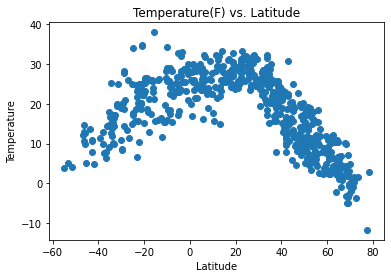

In [70]:
plt.scatter(weather_df.iloc[:,1],weather_df.iloc[:,3])
plt.title('Temperature(F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Humidity Plot vs. Latitude

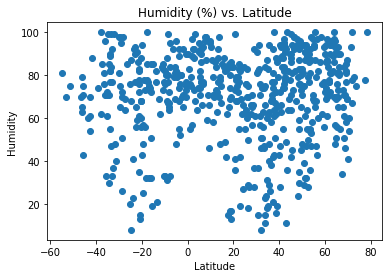

In [71]:
plt.scatter(weather_df.iloc[:,1],weather_df.iloc[:,4])
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

## Cloudiness Plot vs. Latitude

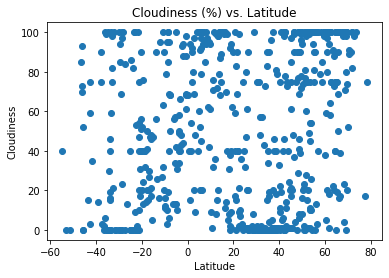

In [73]:
plt.scatter(weather_df.iloc[:,1],weather_df.iloc[:,5])
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Wind Speed Plot vs. Latitude

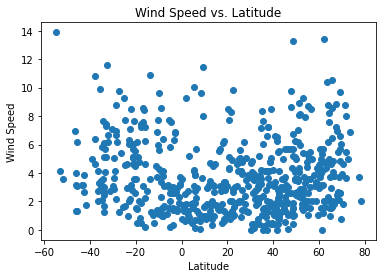

In [74]:
plt.scatter(weather_df.iloc[:,1],weather_df.iloc[:,6])
plt.title('Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [ ]:
Northern_Hemisphere = weather_df.loc[weather_df["Latitude"]>0]
Southern_Hemisphere = weather_df.loc[weather_df["Latitude"]<0]

Northern Hemisphere - Temp vs. Latitude Linear Regression

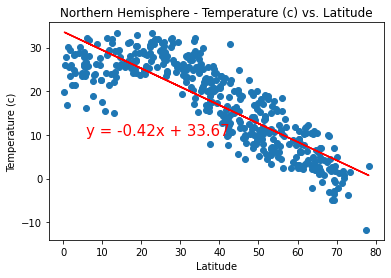

In [89]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Temperature (c) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (c)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

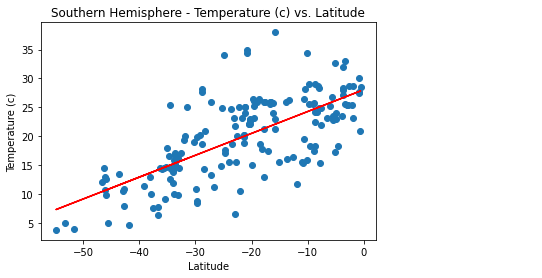

In [93]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Temperature (c) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (c)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

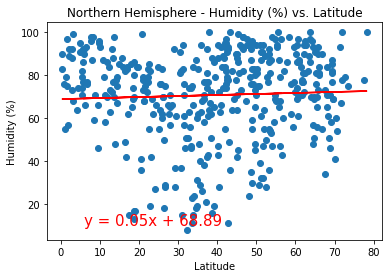

In [95]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

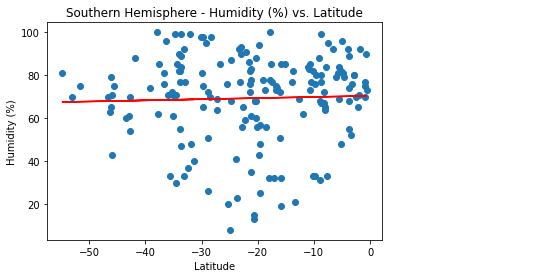

In [96]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

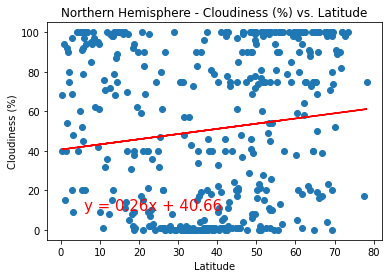

In [97]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

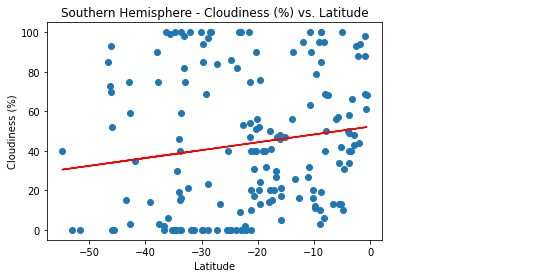

In [98]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

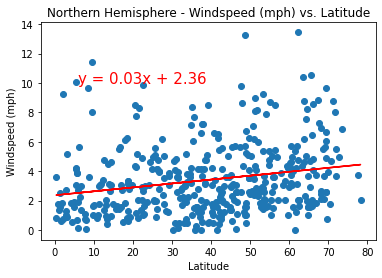

In [99]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Windspeed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

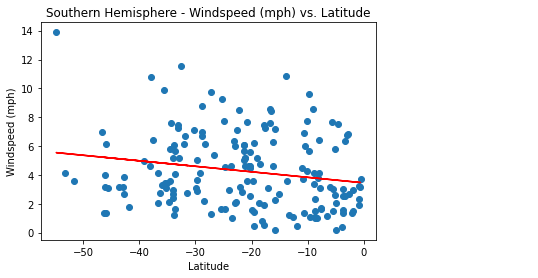

In [104]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Windspeed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()